In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from tqdm import tqdm
from scipy.stats import norm

sns.set()

# Exp Params

# Load & Prepare Data
In this particular analysis we only care about data at the national assembly level

In [10]:
folder_name = "exp2"
file_postfix = "_1"

data_path = f"data/{folder_name}"
figs_path = f"figs/{folder_name}"
data_path, figs_path

('data/exp2', 'figs/exp2')

## Load

### Amended Formula

In [11]:
amend_df = pd.read_csv(f"{data_path}/nat_amend{file_postfix}.csv")
amend_df.head()

,index,seats,forf_seats,tot_rem_seats,tot_surplus,is_ind,is_forfeit,reg_votes,comp_votes,votes,...,mean_diff_perc,min_diff_perc,tot_party_seats,tot_party_votes,tot_forf_seats,tot_forf_votes,tot_ind_seats,tot_ind_votes,tot_seats,tot_votes
0,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,61|5|56|4|69|3|3|5|2|3|39|2|5|4|5|2|7|2|2|5|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,9|2|6|5|10|2|3|2|3|2|8|1|1|1|0|1|2|1|2|0|0|1|1...,403365|183174|340475|201719|422700|145957|1207...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,1421824|129685|1291073|85199|1603244|71207|533...,1421824|129685|1291073|85199|1603244|71207|533...,2843648|259370|2582146|170398|3206488|142414|1...,...,8.224982e-19,-0.001774,392,18163080,0,0,8,1748194,400,19911274
1,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,337|2|2|1|1|2|1|2|1|1|2|2|1|1|1|1|1|1|2|1|1|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,13|2|2|2|2|4|1|1|0|0|4|2|1|0|0|0|0|1|2|1|0|1|1...,507173|124775|118194|76393|66847|114162|100007...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,7773703|54293|52714|30608|28323|40562|36825|36...,7773703|54293|52714|30608|28323|40562|36825|36...,15547406|108586|105428|61216|56646|81124|73650...,...,1.770126e-20,-0.001341,393,18132700,0,0,7,1327546,400,19460246
2,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,55|91|51|92|2|1|1|2|1|2|1|1|1|2|1|1|1|2|2|1|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,6|11|6|8|3|0|1|1|0|1|0|0|1|4|0|0|0|2|3|0|1|1|2...,326766|555394|342601|405050|161465|66899|83579...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,1626540|2670233|1509758|2720998|74564|34511|37...,1626540|2670233|1509758|2720998|74564|34511|37...,3253080|5340466|3019516|5441996|149128|69022|7...,...,-2.678617e-19,-0.001580,392,23106024,0,0,8,1150472,400,24256496
3,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,177|140|2|4|1|1|2|2|2|2|1|2|1|2|1|5|2|2|2|1|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,8|13|4|2|2|1|1|1|2|1|0|2|1|2|0|3|3|1|3|0|1|1|0...,296232|503457|175836|128187|92022|76923|139663...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,4354741|3445677|69243|111825|24294|34069|47353...,4354741|3445677|69243|111825|24294|34069|47353...,8709482|6891354|138486|223650|48588|68138|9470...,...,1.275532e-19,-0.001400,393,19345362,0,0,7,1433757,400,20779119
4,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,47|3|3|3|2|26|2|2|2|2|2|46|52|2|2|2|2|3|2|2|54...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,5|1|2|4|2|10|3|3|3|1|3|6|10|2|2|0|1|4|1|1|12|2...,282634|105789|145404|171979|117898|348811|1348...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,1092465|74834|71371|67396|52804|619676|45502|3...,1092465|74834|71371|67396|52804|619676|45502|3...,2184930|149668|142742|134792|105608|1239352|91...,...,-7.015426e-19,-0.001555,390,18210448,0,0,10,2084683,400,20295131


In [12]:
amend_df = pd.read_csv(f"{data_path}/nat_amend{file_postfix}.csv")
drop_cols = ["max_diff_seats", "mean_diff_seats", "min_diff_seats",	"max_diff_perc", 
             "mean_diff_perc", "min_diff_perc"]
amend_df.drop(drop_cols, inplace=True, axis=1)
amend_df.head()

,index,seats,forf_seats,tot_rem_seats,tot_surplus,is_ind,is_forfeit,reg_votes,comp_votes,votes,...,abs_diff_seats,abs_diff_perc,tot_party_seats,tot_party_votes,tot_forf_seats,tot_forf_votes,tot_ind_seats,tot_ind_votes,tot_seats,tot_votes
0,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,61|5|56|4|69|3|3|5|2|3|39|2|5|4|5|2|7|2|2|5|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,9|2|6|5|10|2|3|2|3|2|8|1|1|1|0|1|2|1|2|0|0|1|1...,403365|183174|340475|201719|422700|145957|1207...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,1421824|129685|1291073|85199|1603244|71207|533...,1421824|129685|1291073|85199|1603244|71207|533...,2843648|259370|2582146|170398|3206488|142414|1...,...,0.37230117358950565|0.5977862785386616|0.27149...,0.00094974789180996|0.0015249649962720963|0.00...,392,18163080,0,0,8,1748194,400,19911274
1,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,337|2|2|1|1|2|1|2|1|1|2|2|1|1|1|1|1|1|2|1|1|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,13|2|2|2|2|4|1|1|0|0|4|2|1|0|0|0|0|1|2|1|0|1|1...,507173|124775|118194|76393|66847|114162|100007...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,7773703|54293|52714|30608|28323|40562|36825|36...,7773703|54293|52714|30608|28323|40562|36825|36...,15547406|108586|105428|61216|56646|81124|73650...,...,0.032501613107854155|0.35344421955913896|0.284...,8.270130561782718e-05|0.0008993491591835594|0....,393,18132700,0,0,7,1327546,400,19460246
2,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,55|91|51|92|2|1|1|2|1|2|1|1|1|2|1|1|1|2|2|1|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,6|11|6|8|3|0|1|1|0|1|0|0|1|4|0|0|0|2|3|0|1|1|2...,326766|555394|342601|405050|161465|66899|83579...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,1626540|2670233|1509758|2720998|74564|34511|37...,1626540|2670233|1509758|2720998|74564|34511|37...,3253080|5340466|3019516|5441996|149128|69022|7...,...,0.1893895721739014|0.39753754259062646|0.22691...,0.00048313666370894404|0.0010141263841597636|0...,392,23106024,0,0,8,1150472,400,24256496
3,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,177|140|2|4|1|1|2|2|2|2|1|2|1|2|1|5|2|2|2|1|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,8|13|4|2|2|1|1|1|2|1|0|2|1|2|0|3|3|1|3|0|1|1|0...,296232|503457|175836|128187|92022|76923|139663...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,4354741|3445677|69243|111825|24294|34069|47353...,4354741|3445677|69243|111825|24294|34069|47353...,8709482|6891354|138486|223650|48588|68138|9470...,...,0.06733644994596943|0.0025100590002011813|0.81...,0.00017133956729253885|6.38691857557383e-06|0....,393,19345362,0,0,7,1433757,400,20779119
4,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,47|3|3|3|2|26|2|2|2|2|2|46|52|2|2|2|2|3|2|2|54...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,5|1|2|4|2|10|3|3|3|1|3|6|10|2|2|0|1|4|1|1|12|2...,282634|105789|145404|171979|117898|348811|1348...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,1092465|74834|71371|67396|52804|619676|45502|3...,1092465|74834|71371|67396|52804|619676|45502|3...,2184930|149668|142742|134792|105608|1239352|91...,...,0.20693373386530567|0.20533135703196326|0.0570...,0.000530599317603353|0.0005264906590563157|0.0...,390,18210448,0,0,10,2084683,400,20295131


In [13]:
amend_df.iloc[0, 0]

'0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|27|28|29|30|31|32|33|34|35|36'

### Original Formula

In [14]:
orig_df = pd.read_csv(f"{data_path}/nat_orig{file_postfix}.csv")
drop_cols = ["max_diff_seats", "mean_diff_seats", "min_diff_seats",	"max_diff_perc", 
             "mean_diff_perc", "min_diff_perc"]
orig_df.drop(drop_cols, inplace=True, axis=1)
orig_df.head()

,party,votes,seats,forf_seats,tot_rem_seats,tot_surplus,is_forfeit,perc_votes,perc_seats,opt_seats,diff_seats,diff_perc,abs_diff_seats,abs_diff_perc
0,party_19|party_2|party_20|party_15|party_1|par...,129685|919194|85199|71207|860045|53393|125733|...,6|40|4|3|38|3|5|70|5|2|3|4|61|2|7|5|6|2|2|2|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,2|7|3|1|5|2|1|6|1|2|2|1|4|1|1|0|1|1|1|1|0|1|1|...,96262|217631|102454|74470|215833|61490|88358|2...,False|False|False|False|False|False|False|Fals...,0.014280067037088423|0.1012156528518291|0.0093...,0.015|0.1|0.01|0.0075|0.095|0.0075|0.0125|0.17...,5.712026814835369|40.48626114073164|3.75262345...,-0.2879731851646312|0.48626114073164217|-0.247...,-0.0007199329629115764|0.001215652851829091|-0...,0.2879731851646312|0.48626114073164217|0.24737...,0.0007199329629115764|0.001215652851829091|0.0...
1,party_1|party_14|party_25|party_7|party_37|par...,7773703|54293|52714|30608|28323|40562|36825|36...,343|2|2|1|1|2|1|2|1|1|2|2|1|1|1|1|1|1|2|1|1|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,7|1|1|1|1|3|1|1|0|0|2|2|1|0|0|0|0|1|1|1|0|0|1|...,247073|63366|60208|38606|34036|58514|51040|511...,False|False|False|False|False|False|False|Fals...,0.8574236600175373|0.005988407683356588|0.0058...,0.8575|0.005|0.005|0.0025|0.0025|0.005|0.0025|...,342.96946400701495|2.395363073342635|2.3256988...,-0.030535992985051053|0.3953630733426352|0.325...,-7.633998246270313e-05|0.0009884076833565876|0...,0.030535992985051053|0.3953630733426352|0.3256...,7.633998246270313e-05|0.0009884076833565876|0....
2,party_4|party_1|party_5|party_18|party_2|party...,2670233|1509758|2720998|74564|1896947|34511|37...,92|52|94|2|66|1|2|2|1|2|1|1|1|2|1|1|1|2|56|2|1...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,5|5|6|2|4|0|1|1|0|1|0|0|1|2|0|0|0|1|3|2|0|1|1|...,282102|219641|219268|91506|186097|40211|47137|...,False|False|False|False|False|False|False|Fals...,0.2311287307586974|0.13068089949183814|0.23552...,0.23|0.13|0.235|0.005|0.165|0.0025|0.005|0.005...,92.45149230347896|52.27235979673526|94.2091291...,0.4514923034789575|0.2723597967352589|0.209129...,0.0011287307586973772|0.0006808994918381384|0....,0.4514923034789575|0.2723597967352589|0.209129...,0.0011287307586973772|0.0006808994918381384|0....
3,party_1|party_20|party_18|party_23|party_6|par...,3445677|69243|111825|24294|34069|47353|38605|4...,142|3|4|1|1|2|2|2|2|1|180|2|1|2|1|5|2|2|2|2|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,6|3|1|1|1|1|1|2|1|0|7|1|1|2|0|2|2|1|2|1|1|1|0|...,240577|90242|71502|24466|44016|70584|53088|597...,False|False|False|False|False|False|False|Fals...,0.3562277097735364|0.007158615072698045|0.0115...,0.355|0.0075|0.01|0.0025|0.0025|0.005|0.005|0....,142.49108390941456|2.863446029079218|4.6243642...,0.4910839094145558|-0.13655397092078214|0.6243...,0.0012277097735364229|-0.00034138492730195497|...,0.4910839094145558|0.13655397092078214|0.62436...,0.0012277097735364229|0.00034138492730195497|0...
4,party_5|party_1|party_3|party_12|party_25|part...,1267754|1075646|1216433|71371|67396|52804|6196...,55|47|53|3|3|2|27|84|2|2|2|2|2|2|2|4|2|2|3|2|2...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,7|2|6|1|2|1|6|6|1|2|2|1|1|1|2|0|0|1|2|1|1|1|1|...,229810|119649|201837|74621|89378|60194|160224|...,False|False|False|False|False|False|False|Fals...,0.13923369705127517|0.11813503984086499|0.1335...,0.1375|0.1175|0.1325|0.0075|0.0075|0.005|0.067...,55.693478820510066|47.25401593634599|53.438904...,0.6934788205100659|0.2540159363459935|0.438904...,0.001733697051275157|0.0006350398408649927|0.0...,0.6934788205100659|0.2540159363459935|0.438904...,0.001733697051275157|0.0006350398408649927|0.0...


## Analysis of Problem Runs

In [22]:
amend_df["tot_seats"].describe()

count    1000.0
mean      400.0
std         0.0
min       400.0
25%       400.0
50%       400.0
75%       400.0
max       400.0
Name: tot_seats, dtype: float64

In [23]:
prob_df = amend_df[amend_df["tot_seats"] != 400].copy()

agr_cols = ['tot_party_seats', 'tot_party_votes', 'tot_forf_seats', 'tot_forf_votes', 'tot_ind_seats', 
             'tot_ind_votes', 'tot_seats', 'tot_votes']

all_cols = ['index', 'seats', 'forf_seats', 'tot_rem_seats', 'tot_surplus',
            'is_ind', 'is_forfeit', 'reg_votes', 'comp_votes', 'votes',
            'perc_votes', 'perc_seats', 'opt_seats', 'diff_seats', 'diff_perc', 'abs_diff_seats', 'abs_diff_perc']

prob_agr_df = prob_df[agr_cols].copy()
prob_all_df = prob_df[all_cols].copy()

In [24]:
prob_agr_df.head()

,tot_party_seats,tot_party_votes,tot_forf_seats,tot_forf_votes,tot_ind_seats,tot_ind_votes,tot_seats,tot_votes


In [25]:
prob_all_df.head()

,index,seats,forf_seats,tot_rem_seats,tot_surplus,is_ind,is_forfeit,reg_votes,comp_votes,votes,perc_votes,perc_seats,opt_seats,diff_seats,diff_perc,abs_diff_seats,abs_diff_perc


In [26]:
def row_to_df(row):
    df_dict = {key: val.split("|") for key,val in row.items()}
    df = pd.DataFrame.from_dict(df_dict)
    df.rename({"index": "party"}, axis=1, inplace=True) 
    df.set_index("party", inplace=True)
    return df

### Single Election

In [27]:
loc = 10
seats_df = row_to_df(prob_all_df.iloc[loc])
ind = prob_all_df.index[loc]
agr_srs = prob_agr_df.iloc[loc, :]
ind

IndexError: single positional indexer is out-of-bounds

In [28]:
agr_srs  

NameError: name 'agr_srs' is not defined

In [29]:
seats_df.head(10)

NameError: name 'seats_df' is not defined

### Load Corresponding Ballot

In [83]:
def load_bal(bal_ind):
    bal_df = pd.read_csv(f"{data_path}/ballot/ballot_{bal_ind}.csv")
    regs = list(bal_df["region"].unique())
    
    reg_bals = {}
    for reg in regs:
        reg_bals[reg] = bal_df[bal_df["region"]==reg]

    tot_bal_df = reg_bals[regs[0]].copy()
    tot_bal_df.set_index("party", inplace=True)
    tot_bal_df["votes"] = bal_df[["party", "votes"]].groupby("party").sum()
    tot_bal_df.head()

    return bal_df, reg_bals, tot_bal_df

In [84]:
bal_df, reg_bals, tot_bal_df = load_bal(ind)
bal_df.head()

,party,votes,is_ind,region
0,party_1,0,False,ec
1,party_2,0,False,ec
2,party_3,0,False,ec
3,party_4,0,False,ec
4,party_5,29,False,ec


In [85]:
reg_bals["gp"].head()

,party,votes,is_ind,region
82,party_1,0,False,gp
83,party_2,0,False,gp
84,party_3,0,False,gp
85,party_4,0,False,gp
86,party_5,0,False,gp


In [86]:
tot_bal_df.head()

,votes,is_ind,region
party,,,
party_1,0,False,ec
party_2,0,False,ec
party_3,0,False,ec
party_4,0,False,ec
party_5,29,False,ec


In [87]:
tot_bal_df["votes"].sum()

32

# Prepare Data

In [35]:
def row_to_df(row):
    df_dict = {key: val.split("|") for key,val in row.items()}
    df = pd.DataFrame.from_dict(df_dict)
    df.set_index("party", inplace=True)
    return df

In [36]:
bool_map = {
    "True": True,
    "False": False
}

In [51]:
agr_cols = ['tot_party_seats', 'tot_party_votes', 'tot_forf_seats', 'tot_forf_votes', 'tot_ind_seats', 
             'tot_ind_votes', 'tot_seats', 'tot_votes']

all_cols = ['index', 'seats', 'forf_seats', 'tot_rem_seats', 'tot_surplus',
            'is_ind', 'is_forfeit', 'reg_votes', 'comp_votes', 'votes',
            'perc_votes', 'perc_seats', 'opt_seats', 'diff_seats', 'diff_perc', 'abs_diff_seats', 'abs_diff_perc']

amend_agr_df = amend_df[agr_cols].copy()
amend_all_df = amend_df[all_cols].copy()

amend_all_df.rename({"index": "party"}, inplace=True, axis=1)

In [52]:
amend_all_df.head()

,party,seats,forf_seats,tot_rem_seats,tot_surplus,is_ind,is_forfeit,reg_votes,comp_votes,votes,perc_votes,perc_seats,opt_seats,diff_seats,diff_perc,abs_diff_seats,abs_diff_perc
0,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,61|5|56|4|69|3|3|5|2|3|39|2|5|4|5|2|7|2|2|5|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,9|2|6|5|10|2|3|2|3|2|8|1|1|1|0|1|2|1|2|0|0|1|1...,403365|183174|340475|201719|422700|145957|1207...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,1421824|129685|1291073|85199|1603244|71207|533...,1421824|129685|1291073|85199|1603244|71207|533...,2843648|259370|2582146|170398|3206488|142414|1...,0.15656199278976915|0.014280067037088423|0.142...,0.1556122448979592|0.012755102040816327|0.1428...,61.372301173589506|5.597786278538662|55.728501...,0.37230117358950565|0.5977862785386616|-0.2714...,0.00094974789180996|0.0015249649962720963|-0.0...,0.37230117358950565|0.5977862785386616|0.27149...,0.00094974789180996|0.0015249649962720963|0.00...
1,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,337|2|2|1|1|2|1|2|1|1|2|2|1|1|1|1|1|1|2|1|1|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,13|2|2|2|2|4|1|1|0|0|4|2|1|0|0|0|0|1|2|1|0|1|1...,507173|124775|118194|76393|66847|114162|100007...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,7773703|54293|52714|30608|28323|40562|36825|36...,7773703|54293|52714|30608|28323|40562|36825|36...,15547406|108586|105428|61216|56646|81124|73650...,0.8574236600175373|0.005988407683356588|0.0058...,0.8575063613231552|0.005089058524173028|0.0050...,336.96749838689215|2.353444219559139|2.2849991...,-0.032501613107854155|0.35344421955913896|0.28...,-8.270130561782718e-05|0.0008993491591835594|0...,0.032501613107854155|0.35344421955913896|0.284...,8.270130561782718e-05|0.0008993491591835594|0....
2,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,55|91|51|92|2|1|1|2|1|2|1|1|1|2|1|1|1|2|2|1|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,6|11|6|8|3|0|1|1|0|1|0|0|1|4|0|0|0|2|3|0|1|1|2...,326766|555394|342601|405050|161465|66899|83579...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,1626540|2670233|1509758|2720998|74564|34511|37...,1626540|2670233|1509758|2720998|74564|34511|37...,3253080|5340466|3019516|5441996|149128|69022|7...,0.14078925911268853|0.2311287307586974|0.13068...,0.14030612244897958|0.23214285714285715|0.1301...,55.1893895721739|90.60246245740937|51.22691260...,0.1893895721739014|-0.39753754259062646|0.2269...,0.00048313666370894404|-0.0010141263841597636|...,0.1893895721739014|0.39753754259062646|0.22691...,0.00048313666370894404|0.0010141263841597636|0...
3,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,177|140|2|4|1|1|2|2|2|2|1|2|1|2|1|5|2|2|2|1|1|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,8|13|4|2|2|1|1|1|2|1|0|2|1|2|0|3|3|1|3|0|1|1|0...,296232|503457|175836|128187|92022|76923|139663...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,4354741|3445677|69243|111825|24294|34069|47353...,4354741|3445677|69243|111825|24294|34069|47353...,8709482|6891354|138486|223650|48588|68138|9470...,0.4502103398220204|0.3562277097735364|0.007158...,0.45038167938931295|0.356234096692112|0.005089...,176.93266355005403|139.9974899409998|2.8133357...,-0.06733644994596943|-0.0025100590002011813|0....,-0.00017133956729253885|-6.38691857557383e-06|...,0.06733644994596943|0.0025100590002011813|0.81...,0.00017133956729253885|6.38691857557383e-06|0....
4,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18...,47|3|3|3|2|26|2|2|2|2|2|46|52|2|2|2|2|3|2|2|54...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,5|1|2|4|2|10|3|3|3|1|3|6|10|2|2|0|1|4|1|1|12|2...,282634|105789|145404|171979|117898|348811|1348...,False|False|False|False|False|False|False|Fals...,False|False|False|False|False|False|False|Fals...,1092465|74834|71371|67396|52804|619676|45502|3...,1092465|74834

In [53]:
df = row_to_df(amend_all_df.iloc[1])
df["votes"] = df["votes"].astype(int)
df["seats"] = df["seats"].astype(int)
df["is_ind"] = df["is_ind"].astype(bool)
df.head()

,seats,forf_seats,tot_rem_seats,tot_surplus,is_ind,is_forfeit,reg_votes,comp_votes,votes,perc_votes,perc_seats,opt_seats,diff_seats,diff_perc,abs_diff_seats,abs_diff_perc
party,,,,,,,,,,,,,,,,
0,337,0,13,507173,True,False,7773703,7773703,15547406,0.8574236600175373,0.8575063613231552,336.96749838689215,-0.032501613107854155,-8.270130561782718e-05,0.032501613107854155,8.270130561782718e-05
1,2,0,2,124775,True,False,54293,54293,108586,0.005988407683356588,0.005089058524173028,2.353444219559139,0.35344421955913896,0.0008993491591835594,0.35344421955913896,0.0008993491591835594
2,2,0,2,118194,True,False,52714,52714,105428,0.00581424718878049,0.005089058524173028,2.2849991451907328,0.28499914519073277,0.0007251886646074618,0.28499914519073277,0.0007251886646074618
3,1,0,2,76393,True,False,30608,30608,61216,0.003376000264715128,0.002544529262086514,1.3267681040330452,0.32676810403304524,0.0008314710026286138,0.32676810403304524,0.0008314710026286138
4,1,0,2,66847,True,False,28323,28323,56646,0.0031239694033431313,0.002544529262086514,1.2277199755138506,0.2277199755138506,0.0005794401412566172,0.2277199755138506,0.0005794401412566172


In [54]:
(df["seats"] > 1).any()

True

In [55]:
df[["votes", "seats"]].describe()

,votes,seats
count,5.600000e+01,56.000000
mean,3.475044e+05,7.142857
std,2.068926e+06,44.881836
min,2.182400e+04,1.000000
25%,3.994000e+04,1.000000
50%,5.073000e+04,1.000000
75%,7.472700e+04,1.000000
max,1.554741e+07,337.000000


<Axes: xlabel='votes', ylabel='party'>

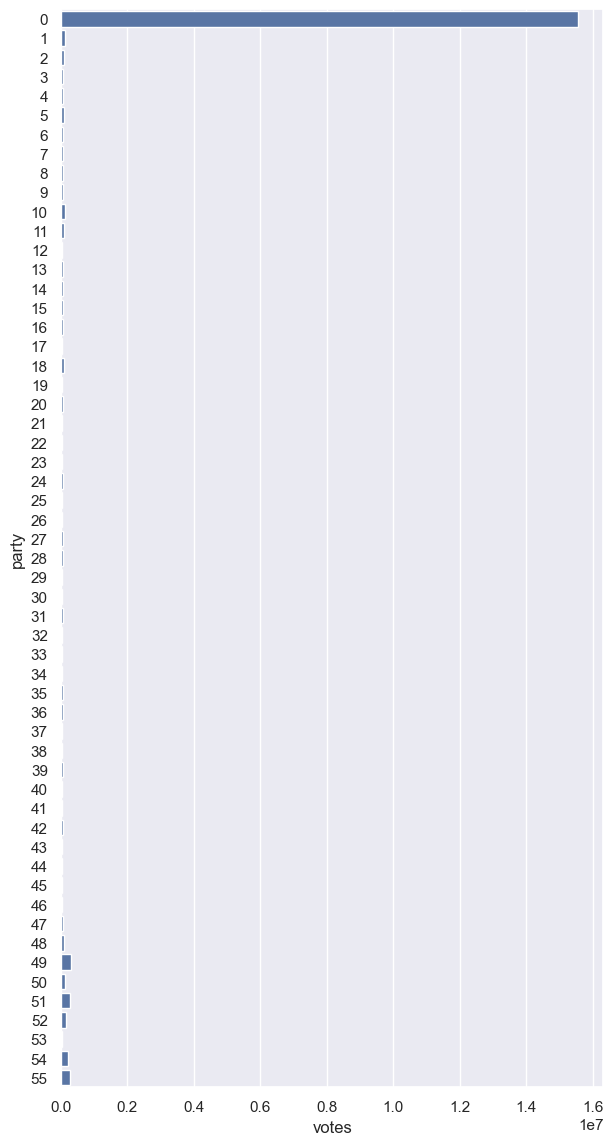

In [56]:
fig, ax = plt.subplots(1, figsize=(7, 14))
sns.barplot(data=df.reset_index(), y="party", x="votes", ax=ax)

In [60]:
ind = 150
df = row_to_df(amend_all_df.iloc[ind])
df[df["is_ind"] == True]

,seats,forf_seats,tot_rem_seats,tot_surplus,is_ind,is_forfeit,reg_votes,comp_votes,votes,perc_votes,perc_seats,opt_seats,diff_seats,diff_perc,abs_diff_seats,abs_diff_perc
party,,,,,,,,,,,,,,,,


In [61]:
# fig, axs = plt.subplots(2, 1, figsize=(10, 10))
# sns.barplot(data=df.reset_index(), x="party", y="votes", ax=)


In [63]:
# tot_seats = [row_to_df(amend_df.iloc[i])["seats"].astype(int).sum() for i in range(amend_df.shape[0])]
# tot_seats

In [65]:
# sns.histplot(x=tot_seats)

In [66]:
orig_tot_seats = [row_to_df(orig_df.iloc[i])["seats"].astype(int).sum() for i in range(amend_df.shape[0])]
orig_tot_seats[:5]

[400, 400, 400, 400, 400]

<Axes: ylabel='Count'>

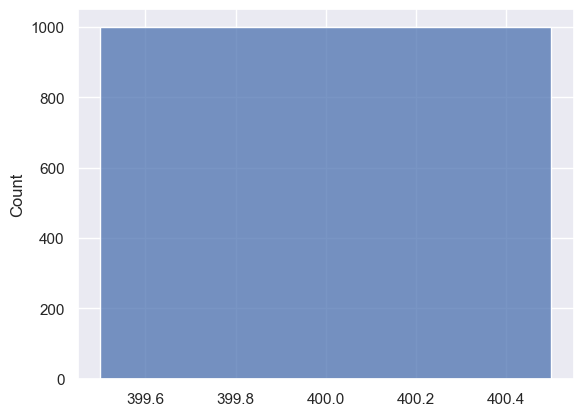

In [18]:
sns.histplot(x=orig_tot_seats)

### Ammended

In [67]:
amend_cols = ["votes", "seats", "is_ind", "is_forfeit"]
amend_type_dict = {
    "votes": "int", 
    "seats": "int",  
    "is_forfeit": "str",
    "is_ind": "str"
}

#### Only Parties

I.e. inter-party proportionality

In [68]:
def prep_amend_p(df):
    p_df = df[amend_cols].astype(amend_type_dict)
    p_df["is_forfeit"] = p_df["is_forfeit"].map(bool_map)
    p_df["is_ind"] = p_df["is_ind"].map(bool_map)
    p_df = p_df[p_df["is_ind"]==False]
    
    # print(p_df.info())
    
    # All Cands
    tot_votes = p_df["votes"].sum()
    tot_seats = p_df["seats"].sum()
    
    p_df["vote_perc"] = p_df["votes"]/tot_votes
    p_df["seat_perc"] = p_df["seats"]/tot_seats
    
    p_df["opt_seats"] = p_df["vote_perc"] * tot_seats
    p_df["seat_diff"] = p_df["opt_seats"] - p_df["seats"]
    
    return p_df

In [70]:
tmp = row_to_df(amend_all_df.iloc[0])
ex_amend_p_df = prep_amend_p(tmp)
ex_amend_p_df

,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
party,,,,,,,,
0,2843648,61,False,False,0.156562,0.155612,61.372301,0.372301
1,259370,5,False,False,0.014280,0.012755,5.597786,0.597786
2,2582146,56,False,False,0.142165,0.142857,55.728502,-0.271498
3,170398,4,False,False,0.009382,0.010204,3.677571,-0.322429
4,3206488,69,False,False,0.176539,0.176020,69.203202,0.203202
5,142414,3,False,False,0.007841,0.007653,3.073614,0.073614
6,106786,3,False,False,0.005879,0.007653,2.304681,-0.695319
7,251466,5,False,False,0.013845,0.012755,5.427200,0.427200
8,86222,2,False,False,0.004747,0.005102,1.860864,-0.139136


#### All

In [71]:
def prep_amend_all(df):
    df = df[amend_cols].astype(amend_type_dict)
    df["is_forfeit"] = df["is_forfeit"].map(bool_map)
    df["is_ind"] = df["is_ind"].map(bool_map)
    
    # All Cands
    tot_votes = df["votes"].sum()
    tot_seats = df["seats"].sum()
    
    df["vote_perc"] = df["votes"]/tot_votes
    df["seat_perc"] = df["seats"]/tot_seats
    
    df["opt_seats"] = df["vote_perc"] * tot_seats
    df["seat_diff"] = df["opt_seats"] - df["seats"]
    
    return df

In [72]:
tmp = row_to_df(amend_all_df.iloc[0])
ex_amend_all_df = prep_amend_all(tmp)
ex_amend_all_df

,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
party,,,,,,,,
0,2843648,61,False,False,0.142816,0.1525,57.126390,-3.873610
1,259370,5,False,False,0.013026,0.0125,5.210515,0.210515
2,2582146,56,False,False,0.129683,0.1400,51.873044,-4.126956
3,170398,4,False,False,0.008558,0.0100,3.423146,-0.576854
4,3206488,69,False,False,0.161039,0.1725,64.415527,-4.584473
5,142414,3,False,False,0.007152,0.0075,2.860972,-0.139028
6,106786,3,False,False,0.005363,0.0075,2.145237,-0.854763
7,251466,5,False,False,0.012629,0.0125,5.051731,0.051731
8,86222,2,False,False,0.004330,0.0050,1.732124,-0.267876


In [73]:
tot_amend_votes = ex_amend_all_df["votes"].sum()
tot_amend_votes

19911274

### Original

In [74]:
orig_cols = ["votes", "seats", "is_forfeit"]
orig_type_dict = {
    "votes": "int", 
    "seats": "int",  
    "is_forfeit": "str"
}

In [75]:
def prep_orig(df):
    df = df[orig_cols].astype(orig_type_dict)
    df["is_forfeit"] = df["is_forfeit"].map(bool_map)
    
    # All Cands
    tot_votes = df["votes"].sum()
    tot_seats = df["seats"].sum()
    
    df["vote_perc"] = df["votes"]/tot_votes
    df["seat_perc"] = df["seats"]/tot_seats
    
    df["opt_seats"] = df["vote_perc"] * tot_seats
    df["seat_diff"] = df["opt_seats"] - df["seats"]
    
    return df

In [76]:
tmp = row_to_df(orig_df.iloc[0])
ex_orig_df = prep_orig(tmp)
ex_orig_df

,votes,seats,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
party,,,,,,,
party_19,129685,6,False,0.014280,0.0150,5.712027,-0.287973
party_2,919194,40,False,0.101216,0.1000,40.486261,0.486261
party_20,85199,4,False,0.009382,0.0100,3.752623,-0.247377
party_15,71207,3,False,0.007841,0.0075,3.136340,0.136340
party_1,860045,38,False,0.094703,0.0950,37.881020,-0.118980
party_10,53393,3,False,0.005879,0.0075,2.351716,-0.648284
party_8,125733,5,False,0.013845,0.0125,5.537959,0.537959
party_5,1603244,70,False,0.176539,0.1750,70.615512,0.615512
party_27,122742,5,False,0.013516,0.0125,5.406220,0.406220


In [77]:
tot_orig_votes = ex_orig_df["votes"].sum()
tot_orig_votes

9081540

## Combine DFs

### Amended

#### Only Parties

In [78]:
n_rows = amend_all_df.shape[0]
dfs_arr = [prep_amend_p(row_to_df(amend_all_df.iloc[i])).reset_index() for i in range(n_rows)]
agr_arrs = [[df["seat_diff"].min(), df["seat_diff"].mean(), df["seat_diff"].max()] for df in dfs_arr] 
agr_amend_p_df = pd.DataFrame(agr_arrs, columns=["min", "mean", "max"])
all_amend_p_df = pd.concat(dfs_arr, ignore_index=True)
print(f"Shape: {all_amend_p_df.shape}")
all_amend_p_df.head()

Shape: (40175, 9)


,party,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,0,2843648,61,False,False,0.156562,0.155612,61.372301,0.372301
1,1,259370,5,False,False,0.014280,0.012755,5.597786,0.597786
2,2,2582146,56,False,False,0.142165,0.142857,55.728502,-0.271498
3,3,170398,4,False,False,0.009382,0.010204,3.677571,-0.322429
4,4,3206488,69,False,False,0.176539,0.176020,69.203202,0.203202


In [79]:
agr_amend_p_df.head()

,min,mean,max
0,-0.695319,4.211191e-16,0.676536
1,-0.526996,-8.791154e-16,0.596474
2,-0.619366,-1.240837e-16,0.529997
3,-0.550065,1.131992e-16,0.813336
4,-0.606400,-1.806834e-16,0.576121


#### All

In [80]:
n_rows = amend_all_df.shape[0]
dfs_arr = [prep_amend_all(row_to_df(amend_all_df.iloc[i])).reset_index() for i in range(n_rows)]
agr_arrs = [[df["seat_diff"].min(), df["seat_diff"].mean(), df["seat_diff"].max()] for df in dfs_arr] 
agr_amend_all_df = pd.DataFrame(agr_arrs, columns=["min", "mean", "max"])
all_amend_all_df = pd.concat(dfs_arr, ignore_index=True)
print(f"Shape: {all_amend_all_df.shape}")
all_amend_all_df.head()

Shape: (48450, 9)


,party,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,0,2843648,61,False,False,0.142816,0.1525,57.126390,-3.873610
1,1,259370,5,False,False,0.013026,0.0125,5.210515,0.210515
2,2,2582146,56,False,False,0.129683,0.1400,51.873044,-4.126956
3,3,170398,4,False,False,0.008558,0.0100,3.423146,-0.576854
4,4,3206488,69,False,False,0.161039,0.1725,64.415527,-4.584473


In [81]:
# all_amend_all_df.to_csv(f"{data_path}/all_amend_all.csv", index=False)

# agr_amend_all_df.to_csv(f"{data_path}/agr_amend_all.csv", index=False)

### Original

In [82]:
# # agr_orig_df.to_csv(f"{data_path}/agr_orig.csv", index=False)
# agr_orig_df = pd.read_csv(f"{data_path}/agr_orig.csv")
# agr_orig_df.head()

In [83]:
# all_orig_df = pd.read_csv(f"{data_path}/all_orig.csv")
# all_orig_df.head()

In [84]:
n_rows = orig_df.shape[0]
dfs_arr = [prep_orig(row_to_df(orig_df.iloc[i])).reset_index() for i in range(n_rows)]
agr_arrs = [[df["seat_diff"].min(), df["seat_diff"].mean(), df["seat_diff"].max()] for df in dfs_arr] 
agr_orig_df = pd.DataFrame(agr_arrs, columns=["min", "mean", "max"])
all_orig_df = pd.concat(dfs_arr, ignore_index=True)
print(f"Shape: {all_orig_df.shape}")
all_orig_df.head()

Shape: (40175, 8)


,party,votes,seats,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff
0,party_19,129685,6,False,0.014280,0.0150,5.712027,-0.287973
1,party_2,919194,40,False,0.101216,0.1000,40.486261,0.486261
2,party_20,85199,4,False,0.009382,0.0100,3.752623,-0.247377
3,party_15,71207,3,False,0.007841,0.0075,3.136340,0.136340
4,party_1,860045,38,False,0.094703,0.0950,37.881020,-0.118980


In [85]:
# agr_orig_df.to_csv(f"{data_path}/agr_orig.csv", index=False)

# all_orig_df.to_csv(f"{data_path}/all_orig.csv", index=False)

# Analysis

## Common Fuctions

In [86]:
def calc_stats(x):
    stats = {
        "min": x.min(),
        "mean": x.mean(),
        "max": x.max()
    }
    return stats

## Proportionality
Here optimal seats is calculated using both the parties and independents.

#### All

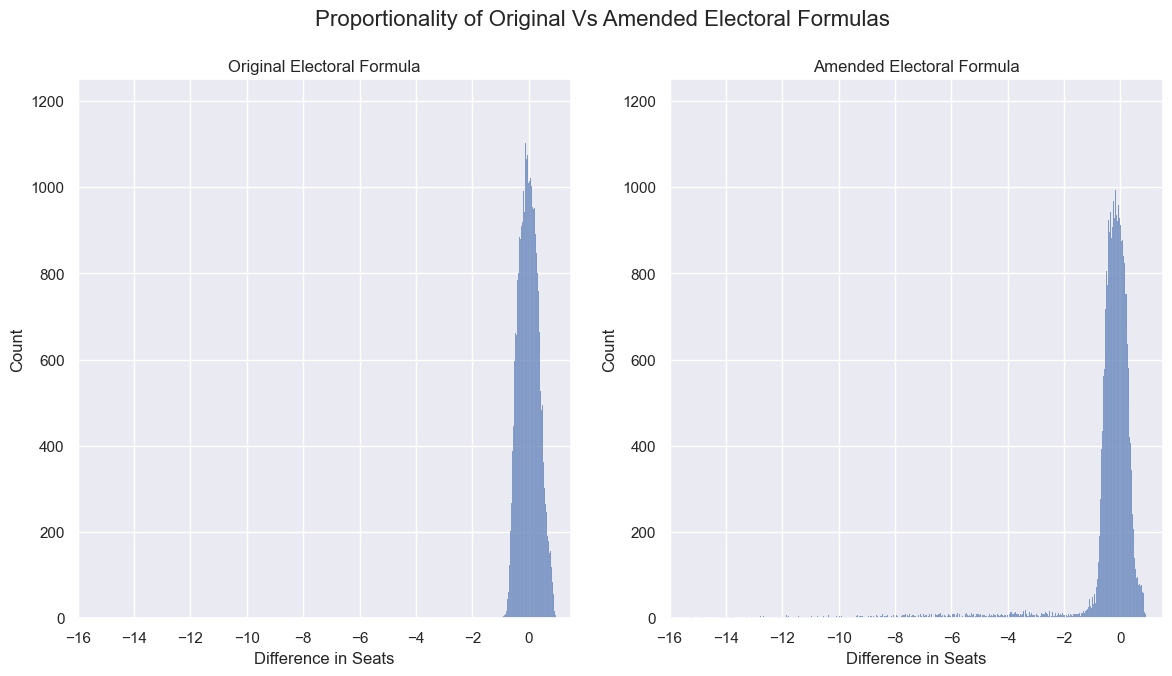

In [92]:
amend_all_data = all_amend_all_df
orig_all_data = all_orig_df
amend_all_data = amend_all_data[amend_all_data["is_ind"]==False]

fig, axs = plt.subplots(1,2, figsize=(14, 7))

fig.suptitle('Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

for ax in axs:
    ax.set_xlim(-16, 1.5)
    ax.set_ylim(0, 1250)
    ax.set_xlabel("Difference in Seats")

axs[0].set_title("Original Electoral Formula")
axs[1].set_title("Amended Electoral Formula")
    
hist_kwargs = {"binwidth":0.025}

sns.histplot(orig_all_data["seat_diff"], ax=axs[0], **hist_kwargs)
sns.histplot(amend_all_data["seat_diff"], ax=axs[1], **hist_kwargs)

fig.savefig(f"{figs_path}/prop.png")

In [93]:
sd_orig_stats = calc_stats(orig_all_data["seat_diff"])
sd_amend_stats = calc_stats(amend_all_data["seat_diff"])

no_dec = 3

print("Original:")
print(f"\t min: {sd_orig_stats['min'].round(no_dec)}, mean: {sd_orig_stats['mean'].round(no_dec)}, max: {sd_orig_stats['max'].round(no_dec)}")

print("Ammended:")
print(f"\t min: {sd_amend_stats['min'].round(no_dec)}, mean: {sd_amend_stats['mean'].round(no_dec)}, max: {sd_amend_stats['max'].round(no_dec)}")

Original:
	 min: -1.126, mean: -0.0, max: 0.964
Ammended:
	 min: -44.449, mean: -0.699, max: 0.893


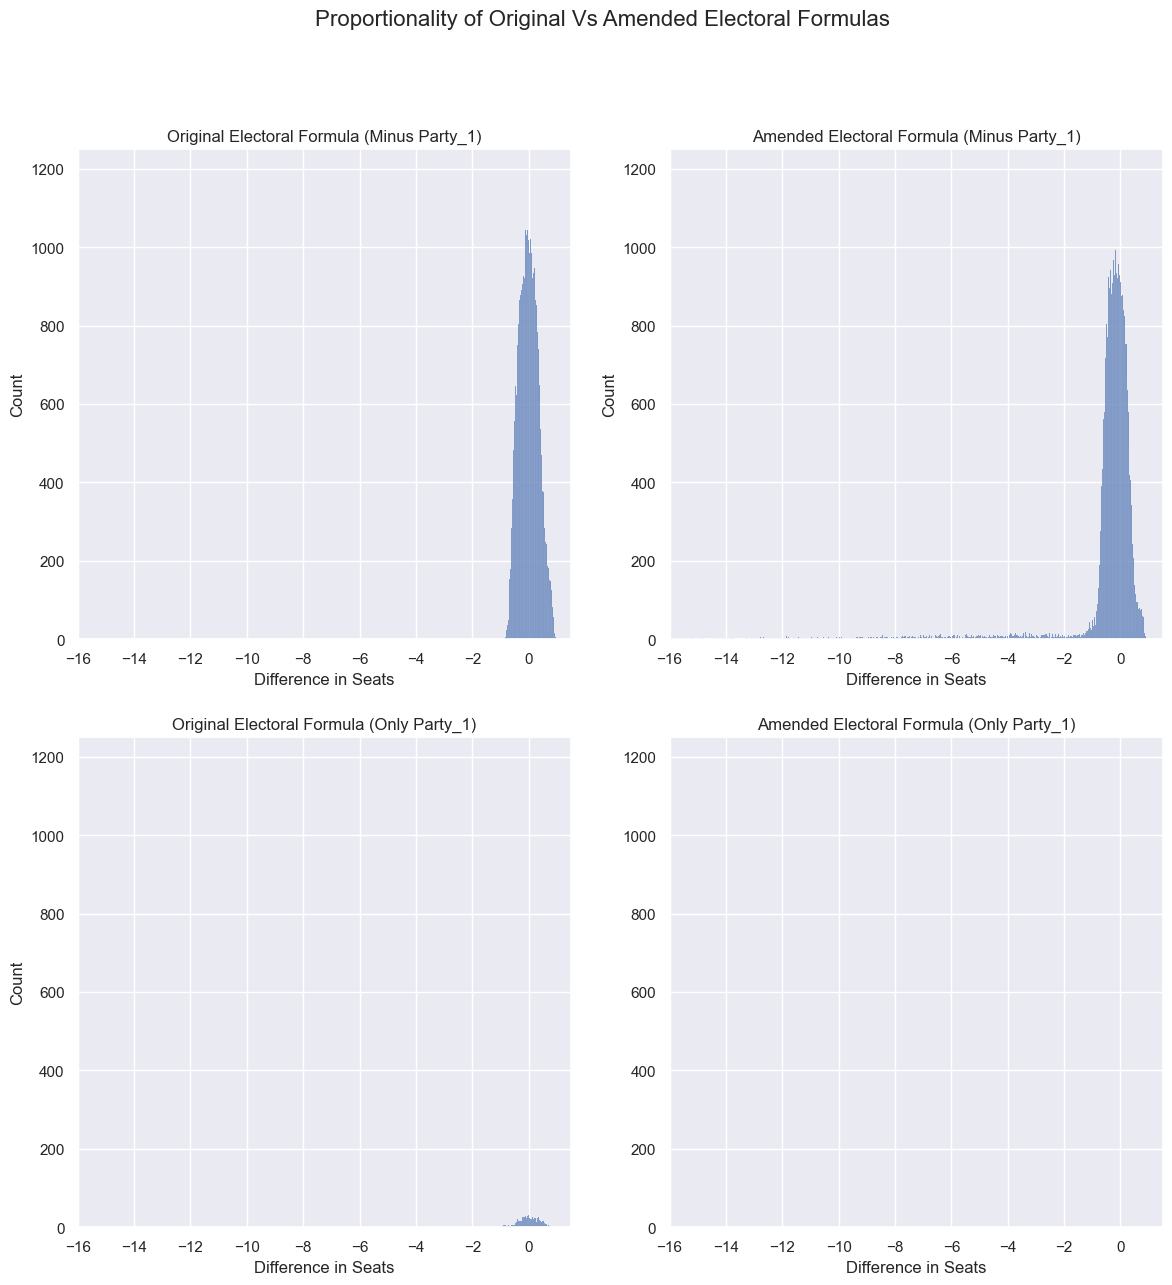

In [95]:
y_max = 1250

fig, axs = plt.subplots(2,2, figsize=(14, 14))

fig.suptitle('Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

hist_kwargs = {"binwidth":0.025}

amend_all_data = all_amend_all_df[all_amend_all_df["party"]!="party_1"]
orig_all_data = all_orig_df[all_orig_df["party"]!="party_1"]
amend_all_data = amend_all_data[amend_all_data["is_ind"]==False]

for ax in axs[0]:
    ax.set_xlim(-16, 1.5)
    ax.set_ylim(0, y_max)
    ax.set_xlabel("Difference in Seats")

axs[0][0].set_title("Original Electoral Formula (Minus Party_1)")
axs[0][1].set_title("Amended Electoral Formula (Minus Party_1)")

sns.histplot(orig_all_data["seat_diff"], ax=axs[0][0], **hist_kwargs)
sns.histplot(amend_all_data["seat_diff"], ax=axs[0][1], **hist_kwargs)

amend_all_data = all_amend_all_df[all_amend_all_df["party"]=="party_1"]
orig_all_data = all_orig_df[all_orig_df["party"]=="party_1"]
amend_all_data = amend_all_data[amend_all_data["is_ind"]==False]

for ax in axs[1]:
    ax.set_xlim(-16, 1.5)
    ax.set_ylim(0, y_max)
    ax.set_xlabel("Difference in Seats")

axs[1][0].set_title("Original Electoral Formula (Only Party_1)")
axs[1][1].set_title("Amended Electoral Formula (Only Party_1)")

sns.histplot(orig_all_data["seat_diff"], ax=axs[1][0], **hist_kwargs)
sns.histplot(amend_all_data["seat_diff"], ax=axs[1][1], **hist_kwargs)

fig.savefig(f"{figs_path}/prop_dec.png")

#### Agr

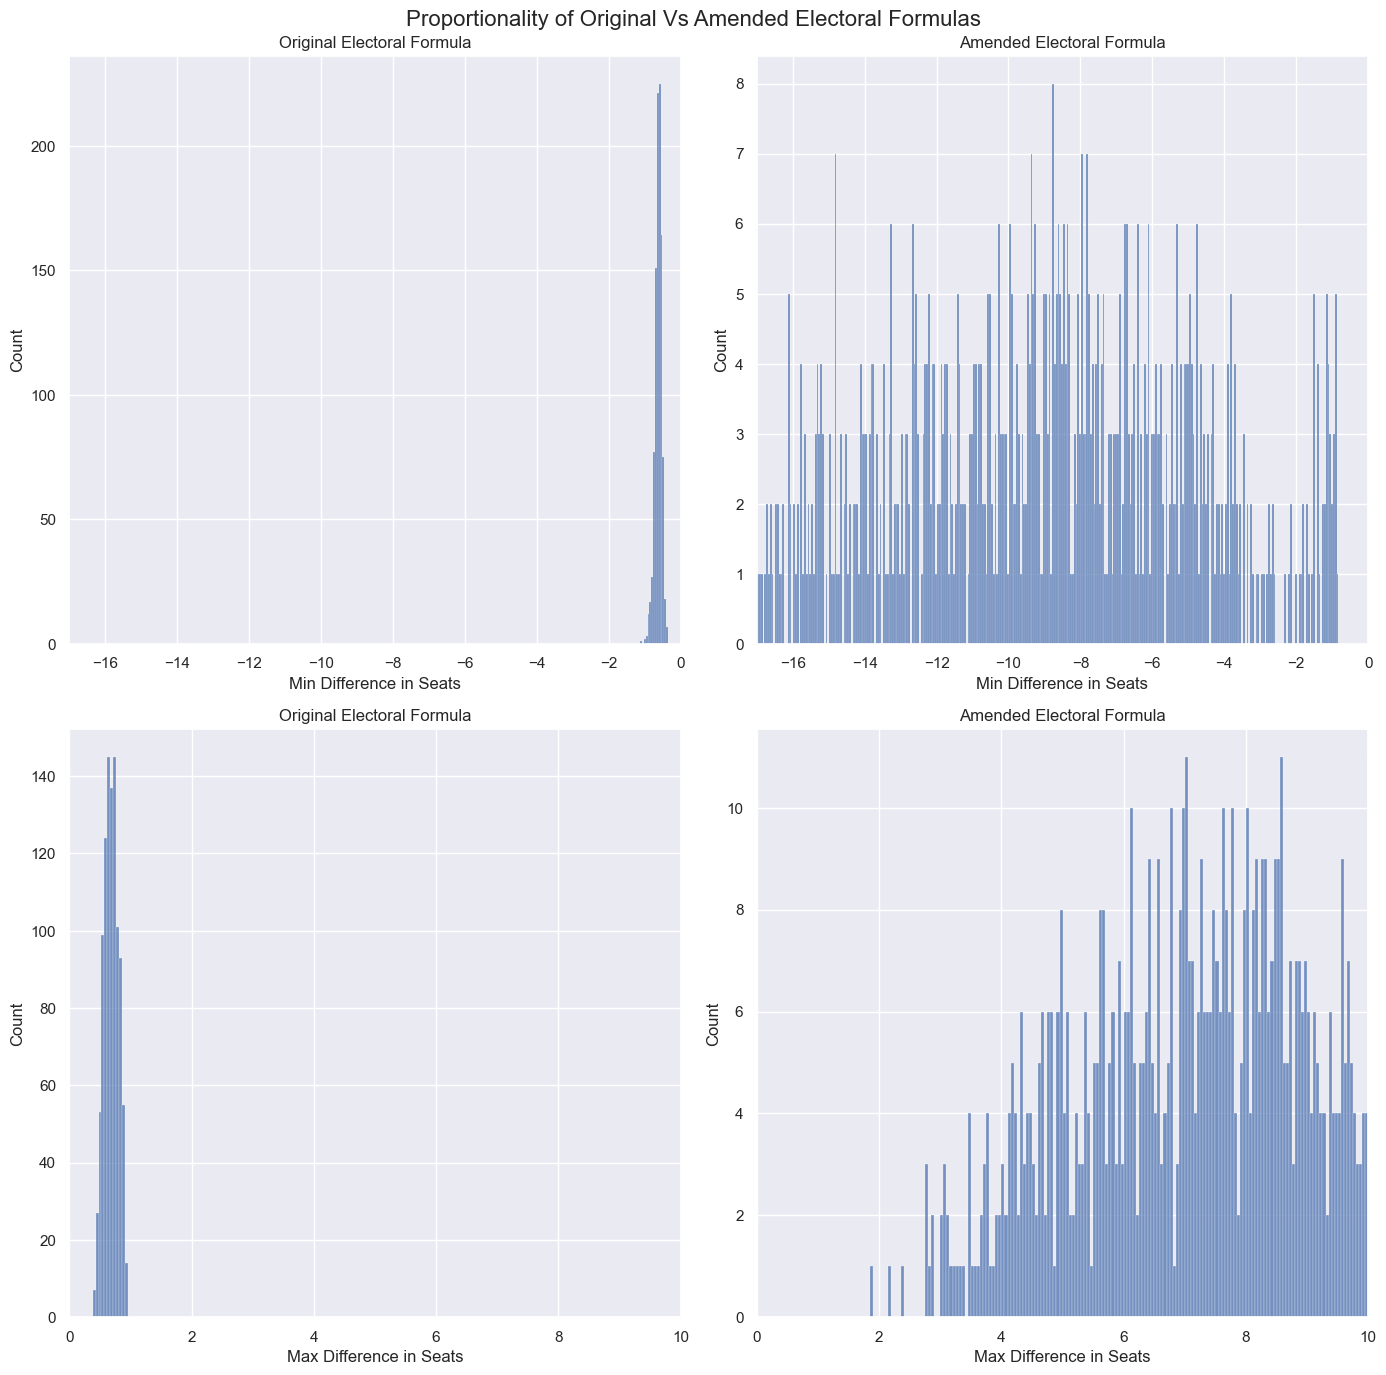

In [96]:
amend_data = agr_amend_all_df
orig_data = agr_orig_df

fig, axs = plt.subplots(2, 2, figsize=(14, 14))

fig.suptitle('Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

for ax in axs[0]:
    ax.set_xlim(-17, 0)
    # ax.set_ylim(0, 80000)
    ax.set_xlabel("Min Difference in Seats")
    
# for ax in axs[1]:
#     # ax.set_xlim(-16, 1.5)
#     # ax.set_ylim(0, 80000)
#     ax.set_xlabel("Mean Difference in Seats")
    
for ax in axs[1]:
    ax.set_xlim(0, 10)
    # ax.set_ylim(0, 80000)
    ax.set_xlabel("Max Difference in Seats")

for i in range(2):
    axs[i][0].set_title("Original Electoral Formula")
    axs[i][1].set_title("Amended Electoral Formula")
    
hist_kwargs = {"binwidth":0.05}
sns.histplot(orig_data["min"], ax=axs[0][0], **hist_kwargs)
sns.histplot(amend_data["min"], ax=axs[0][1], **hist_kwargs)

hist_kwargs = {"binwidth":0.05}
sns.histplot(orig_data["max"], ax=axs[1][0], **hist_kwargs)
sns.histplot(amend_data["max"], ax=axs[1][1], **hist_kwargs)

# sns.histplot(orig_data["mean"], ax=axs[1][0]) #, binwidth=0.001)
# sns.histplot(amend_data["mean"], ax=axs[1][1]) #, binwidth=0.001)

# sns.histplot(amend_all_data["seat_diff"], ax=axs[1], **hist_kwargs)

plt.tight_layout(pad=1)
fig.savefig(f"{figs_path}/agr_prop.png")

In [97]:
no_dec = 3

print("Original:")
for val in ["min", "mean", "max"]:
    data = orig_data[val]
    print(f"\t {val} -> min: {data.min().round(no_dec)}, mean: {data.mean().round(no_dec)}, max: {data.max().round(no_dec)}")

print("Amended:")
for val in ["min", "mean", "max"]:
    data = amend_data[val]
    print(f"\t {val} -> min: {data.min().round(no_dec)}, mean: {data.mean().round(no_dec)}, max: {data.max().round(no_dec)}")

Original:
	 min -> min: -1.126, mean: -0.621, max: -0.355
	 mean -> min: -0.0, mean: -0.0, max: 0.0
	 max -> min: 0.381, mean: 0.689, max: 0.964
Amended:
	 min -> min: -44.449, mean: -11.976, max: -0.829
	 mean -> min: -0.0, mean: -0.0, max: 0.0
	 max -> min: 1.853, mean: 8.781, max: 29.55


## Inter-Party Proportionality
Optimal seats for amended formula is only calculated using parties 

#### All

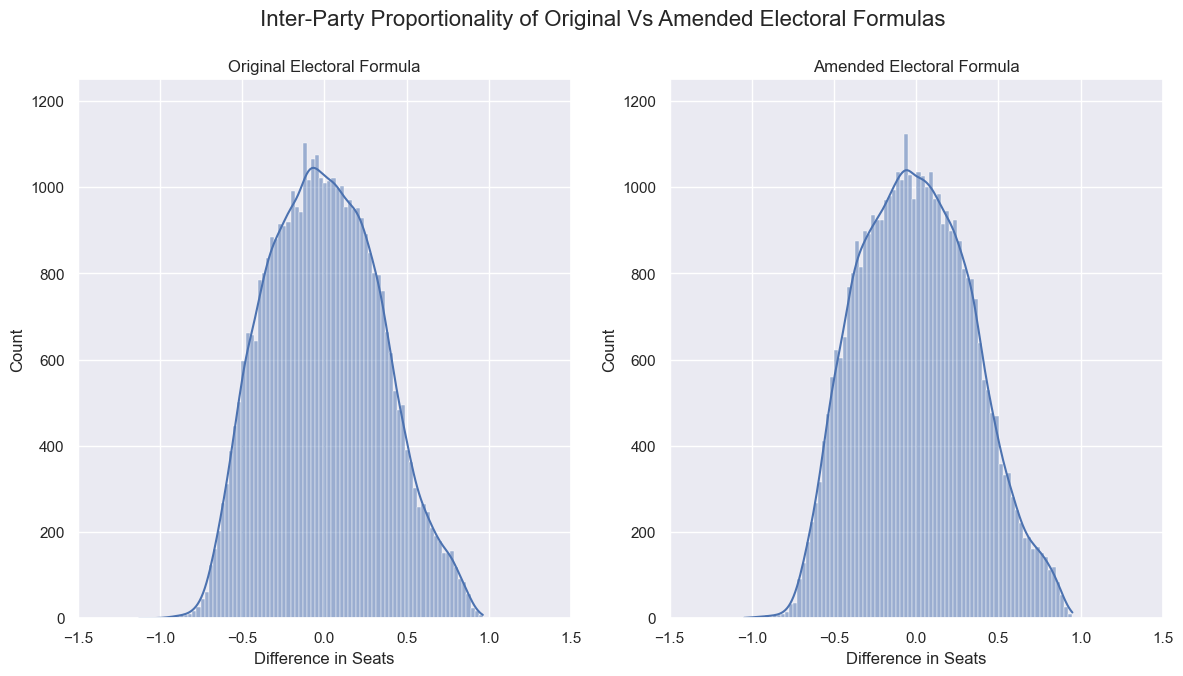

In [99]:
y_max = 1250

amend_all_data = all_amend_p_df
orig_all_data = all_orig_df
amend_all_data = amend_all_data[amend_all_data["is_ind"]==False]

fig, axs = plt.subplots(1,2, figsize=(14, 7))

fig.suptitle('Inter-Party Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

for ax in axs:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(0, y_max)

axs[0].set_xlabel("Difference in Seats")
axs[1].set_xlabel("Difference in Seats")

axs[0].set_title("Original Electoral Formula")
axs[1].set_title("Amended Electoral Formula")
    
hist_kwargs = {"binwidth":0.025, "kde": True}

sns.histplot(orig_all_data["seat_diff"], ax=axs[0], **hist_kwargs)
sns.histplot(amend_all_data["seat_diff"], ax=axs[1], **hist_kwargs)

fig.savefig(f"{figs_path}/ip_prop.png")

In [100]:
sd_orig_stats = calc_stats(orig_all_data["seat_diff"])
sd_amend_stats = calc_stats(amend_all_data["seat_diff"])

no_dec = 3

print("Original:")
print(f"\t min: {sd_orig_stats['min'].round(no_dec)}, mean: {sd_orig_stats['mean'].round(no_dec)}, max: {sd_orig_stats['max'].round(no_dec)}")

print("Ammended:")
print(f"\t min: {sd_amend_stats['min'].round(no_dec)}, mean: {sd_amend_stats['mean'].round(no_dec)}, max: {sd_amend_stats['max'].round(no_dec)}")

Original:
	 min: -1.126, mean: -0.0, max: 0.964
Ammended:
	 min: -1.047, mean: -0.0, max: 0.95


In [111]:
x1 = orig_all_data["seat_diff"]
mu, std = norm.fit(x1)
mu, std

(-1.0838319110341913e-17, 0.340987495961498)

In [112]:
x2 = amend_all_data["seat_diff"]
mu, std = norm.fit(x2)
mu, std

(-2.1803757720703137e-17, 0.3430507468178547)

##### Abs

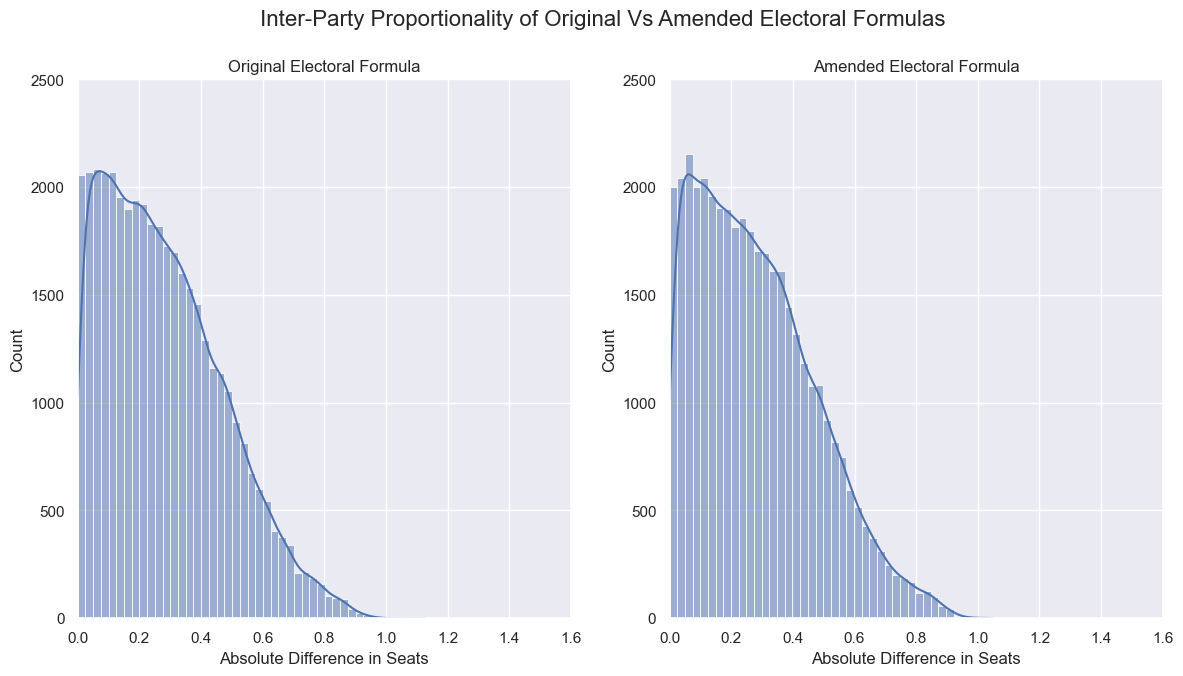

In [101]:
y_max = 1250 * 2

amend_all_data = all_amend_p_df
orig_all_data = all_orig_df
amend_all_data = amend_all_data[amend_all_data["is_ind"]==False]

fig, axs = plt.subplots(1,2, figsize=(14, 7))

fig.suptitle('Inter-Party Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

for ax in axs:
    ax.set_xlim(0, 1.6)
    ax.set_ylim(0, y_max)

axs[0].set_xlabel("Absolute Difference in Seats")
axs[1].set_xlabel("Absolute Difference in Seats")

axs[0].set_title("Original Electoral Formula")
axs[1].set_title("Amended Electoral Formula")
    
hist_kwargs = {"binwidth":0.025, "kde": True}

sns.histplot(orig_all_data["seat_diff"].abs(), ax=axs[0], **hist_kwargs)
sns.histplot(amend_all_data["seat_diff"].abs(), ax=axs[1], **hist_kwargs)

fig.savefig(f"{figs_path}/ip_prop_abs.png")

In [102]:
sd_orig_stats = calc_stats(orig_all_data["seat_diff"].abs())
sd_amend_stats = calc_stats(amend_all_data["seat_diff"].abs())

no_dec = 3

print("Original:")
print(f"\t min: {sd_orig_stats['min'].round(no_dec)}, mean: {sd_orig_stats['mean'].round(no_dec)}, max: {sd_orig_stats['max'].round(no_dec)}")

print("Ammended:")
print(f"\t min: {sd_amend_stats['min'].round(no_dec)}, mean: {sd_amend_stats['mean'].round(no_dec)}, max: {sd_amend_stats['max'].round(no_dec)}")

Original:
	 min: 0.0, mean: 0.281, max: 1.126
Ammended:
	 min: 0.0, mean: 0.283, max: 1.047


#### Agr

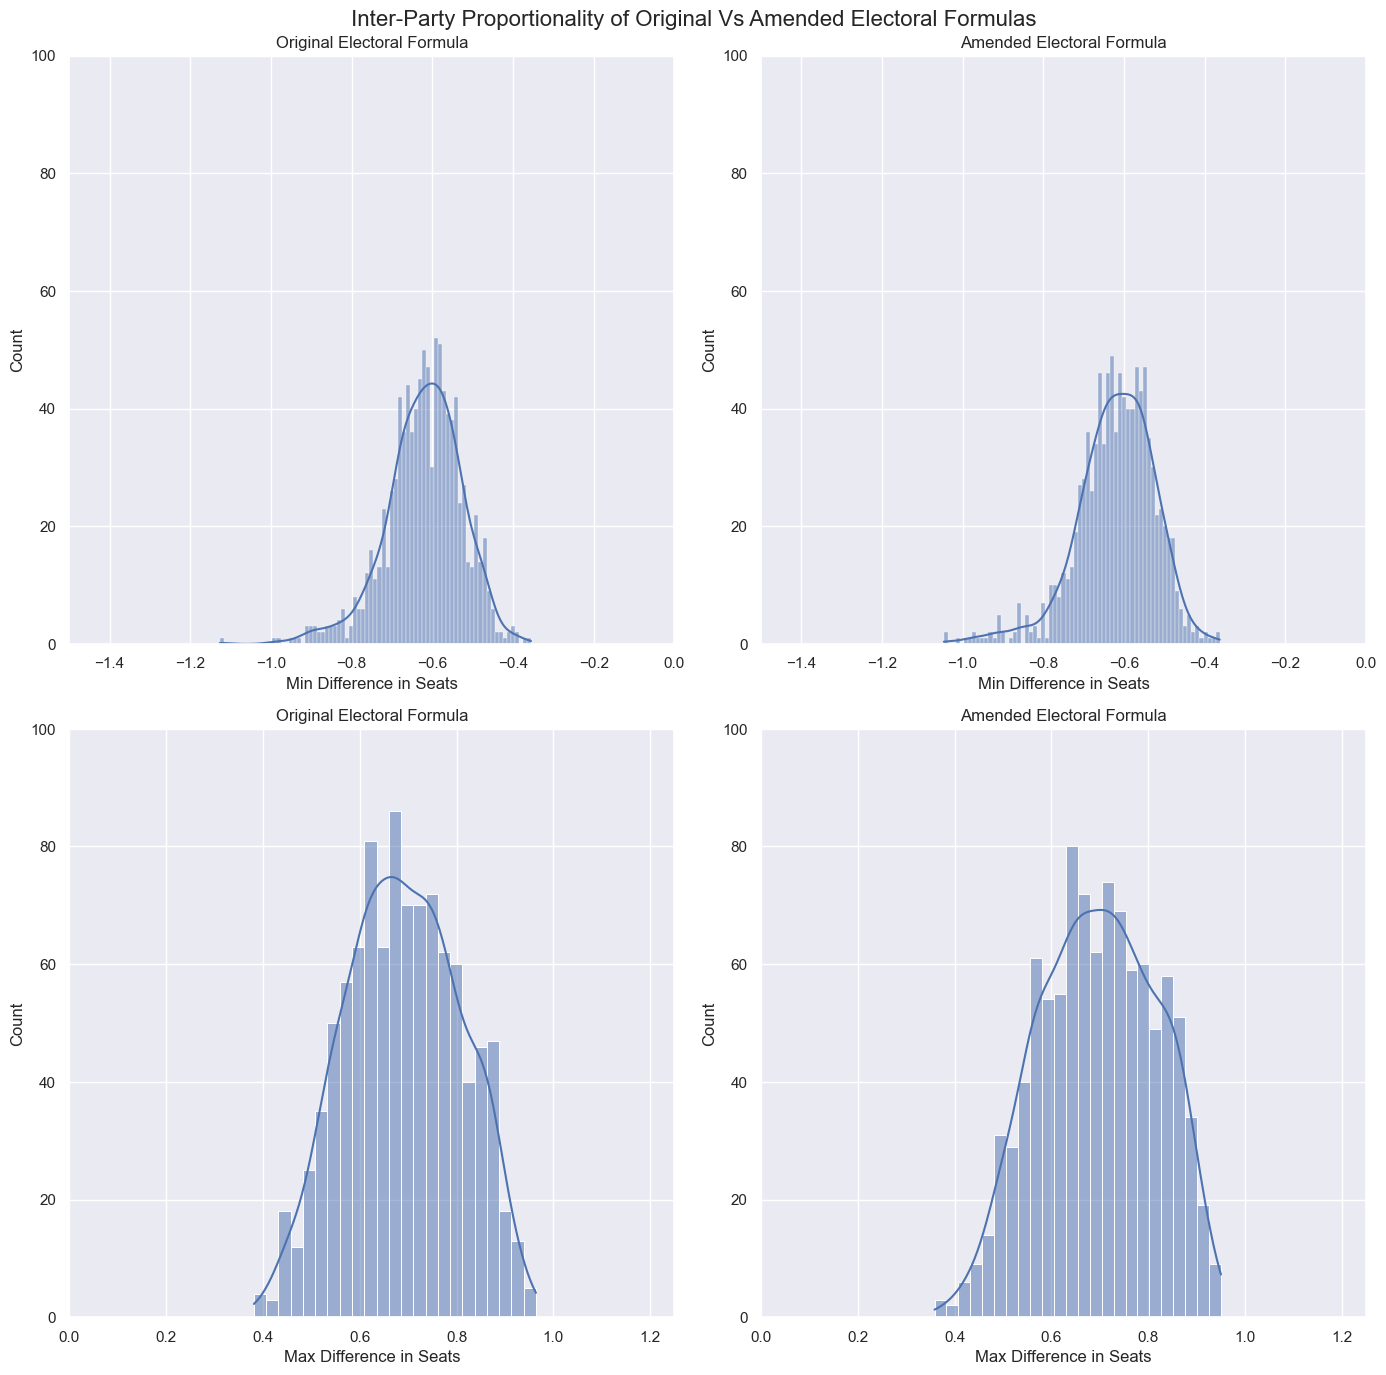

In [106]:
y_max = 100

amend_data = agr_amend_p_df
orig_data = agr_orig_df

fig, axs = plt.subplots(2, 2, figsize=(14, 14))

fig.suptitle('Inter-Party Proportionality of Original Vs Amended Electoral Formulas', fontsize=16)

for ax in axs[0]:
    ax.set_xlim(-1.5, 0)
    ax.set_ylim(0, y_max)
    ax.set_xlabel("Min Difference in Seats")
    
for ax in axs[1]:
    ax.set_xlim(0, 1.25)
    ax.set_ylim(0, y_max)
    ax.set_xlabel("Max Difference in Seats")

for i in range(2):
    axs[i][0].set_title("Original Electoral Formula")
    axs[i][1].set_title("Amended Electoral Formula")
    
hist_kwargs = {"binwidth":0.01, "kde":True}
sns.histplot(orig_data["min"], ax=axs[0][0], **hist_kwargs)
sns.histplot(amend_data["min"], ax=axs[0][1], **hist_kwargs)

hist_kwargs = {"binwidth":0.025, "kde":True}
sns.histplot(orig_data["max"], ax=axs[1][0], **hist_kwargs)
sns.histplot(amend_data["max"], ax=axs[1][1], **hist_kwargs)

plt.tight_layout(pad=1)
fig.savefig(f"{figs_path}/agr_ip_prop.png")

In [107]:
no_dec = 3

print("Original:")
for val in ["min", "mean", "max"]:
    data = orig_data[val]
    print(f"\t {val} -> min: {data.min().round(no_dec)}, mean: {data.mean().round(no_dec)}, max: {data.max().round(no_dec)}")

print("Amended:")
for val in ["min", "mean", "max"]:
    data = amend_data[val]
    print(f"\t {val} -> min: {data.min().round(no_dec)}, mean: {data.mean().round(no_dec)}, max: {data.max().round(no_dec)}")

Original:
	 min -> min: -1.126, mean: -0.621, max: -0.355
	 mean -> min: -0.0, mean: -0.0, max: 0.0
	 max -> min: 0.381, mean: 0.689, max: 0.964
Amended:
	 min -> min: -1.047, mean: -0.621, max: -0.363
	 mean -> min: -0.0, mean: -0.0, max: 0.0
	 max -> min: 0.359, mean: 0.696, max: 0.95


## Bias Towards Larger Parties

In [108]:
n_samples = 100000

### Proportionality

In [ ]:
amend_p1_data = all_amend_all_df
amend_p1_data = amend_p1_data[amend_p1_data["party"]=="party_1"].reset_index().drop("index", axis=1)
amend_p1_data["perc_votes"] = (amend_p1_data["votes"] / tot_amend_votes) * 100

orig_p1_data = all_orig_df
orig_p1_data = orig_p1_data[orig_p1_data["party"]=="party_1"].reset_index().drop("index", axis=1)
orig_p1_data["perc_votes"] = (orig_p1_data["votes"] / tot_orig_votes) * 100

amend_p1_data = amend_p1_data.sample(n_samples)
orig_p1_data = orig_p1_data.loc[amend_p1_data.index] 

print(f"Shape: {orig_p1_data.shape}")

In [ ]:
orig_p1_data.head()

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14, 7))

cmap = matplotlib.cm.get_cmap("Blues")
bg_color = cmap(0)

for ax in axs:
    ax.set_facecolor(bg_color)
    ax.set_xlim(0, 100)
    ax.set_ylim(-20, 1)
    ax.set_xlabel("Percentage of Votes (%)")
    ax.set_ylabel("Difference in Seats")
    
    
kde_kwargs = {
    "x": "perc_votes",
    "y": "seat_diff",
    "fill": True,
    "cmap": "Blues",
    "levels": 100,
    "thresh": 0
}

reg_kwargs = {
    "x": "perc_votes",
    "y": "seat_diff",
    "color": "aqua",
    "scatter": False
}

axs[0].set_title("Original Electoral Formula")
axs[1].set_title("Amended Electoral Formula")

sns.kdeplot(data=orig_p1_data, ax=axs[0], **kde_kwargs)
sns.regplot(data=orig_p1_data, ax=axs[0], **reg_kwargs)

sns.kdeplot(data=amend_p1_data, ax=axs[1], **kde_kwargs)
sns.regplot(data=amend_p1_data, ax=axs[1], **reg_kwargs)

fig.savefig(f"{figs_path}/bias.png")

In [ ]:
no_decs = 3

o_corr = orig_p1_data["perc_votes"].corr(orig_p1_data["seat_diff"])
a_corr = amend_p1_data["perc_votes"].corr(amend_p1_data["seat_diff"])

print("Correlation Coefficients:")
print(f"\t Original: {o_corr.round(no_decs)}")
print(f"\t Ammended: {a_corr.round(no_decs)}")

### Inter-Party Proportionality

In [46]:
amend_p1_data.head()

,party,votes,seats,is_ind,is_forfeit,vote_perc,seat_perc,opt_seats,seat_diff,perc_votes
85913,party_1,12708630,160,False,False,0.40536,0.405063,160.117084,0.117084,38.402494
116679,party_1,15552838,196,False,False,0.49608,0.496203,195.951497,-0.048503,46.997023
28646,party_1,23080956,291,False,False,0.73620,0.736709,290.798881,-0.201119,69.745227
93076,party_1,11433250,145,False,False,0.36468,0.366162,144.413146,-0.586854,34.548596
76610,party_1,5936710,75,False,False,0.18936,0.189873,74.797102,-0.202898,17.939343


Note: I'm negating seat_diff so it is rather equal to seats - opt_seats

In [47]:
amend_p1_data = all_amend_p_df
amend_p1_data = amend_p1_data[amend_p1_data["party"]=="party_1"].reset_index().drop("index", axis=1)
amend_p1_data["perc_votes"] = (amend_p1_data["votes"] / tot_amend_votes) * 100
amend_p1_data["seat_diff"] = amend_p1_data["seat_diff"] * (-1)

orig_p1_data = all_orig_df
orig_p1_data = orig_p1_data[orig_p1_data["party"]=="party_1"].reset_index().drop("index", axis=1)
orig_p1_data["perc_votes"] = (orig_p1_data["votes"] / tot_orig_votes) * 100
orig_p1_data["seat_diff"] = orig_p1_data["seat_diff"] * (-1)

amend_p1_data = amend_p1_data.sample(n_samples)
orig_p1_data = orig_p1_data.loc[amend_p1_data.index] 

print(f"Shape: {orig_p1_data.shape}")

Shape: (100000, 9)


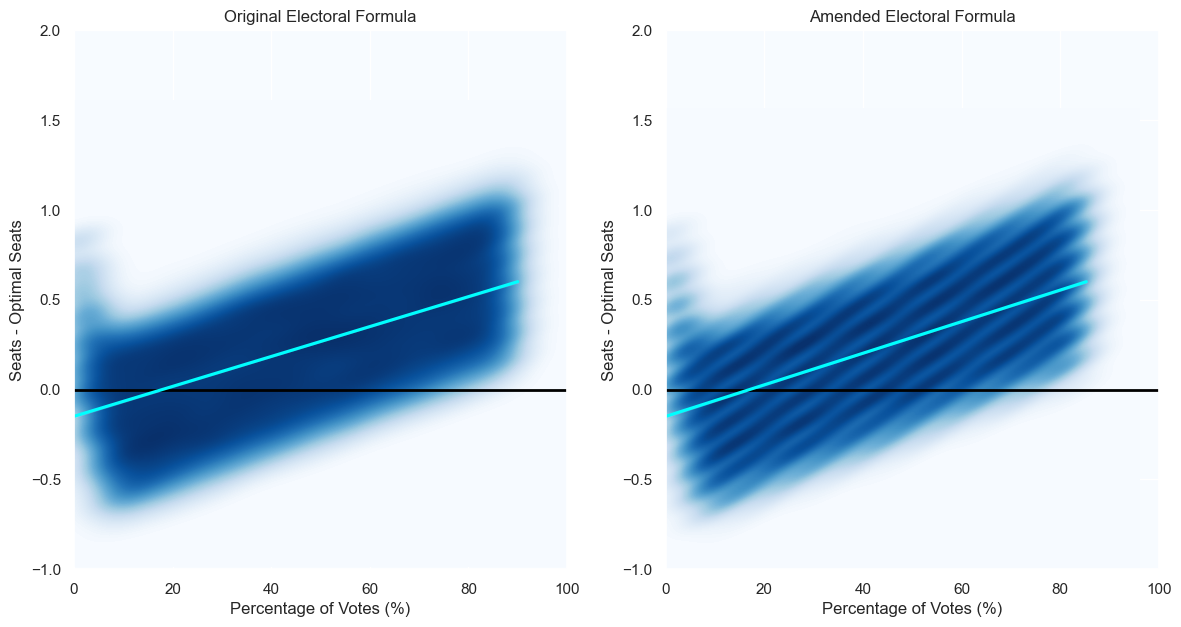

In [51]:
fig, axs = plt.subplots(1,2, figsize=(14, 7))

cmap = matplotlib.cm.get_cmap("Blues")
bg_color = cmap(0)    
    
kde_kwargs = {
    "x": "perc_votes",
    "y": "seat_diff",
    "fill": True,
    "cmap": "Blues",
    "levels": 500,
    "thresh": 0
}

reg_kwargs = {
    "x": "perc_votes",
    "y": "seat_diff",
    "color": "aqua",
    "scatter": False
}

axs[0].set_title("Original Electoral Formula")
axs[1].set_title("Amended Electoral Formula")

sns.kdeplot(data=orig_p1_data, ax=axs[0], **kde_kwargs)
sns.kdeplot(data=amend_p1_data, ax=axs[1], **kde_kwargs)

for ax in axs:
    sns.lineplot(x=[0,100], y=[0,0], ax=ax, color='black', linewidth=2)

sns.regplot(data=amend_p1_data, ax=axs[1], **reg_kwargs)
sns.regplot(data=orig_p1_data, ax=axs[0], **reg_kwargs)
    
for ax in axs:
    ax.set_facecolor(bg_color)
    ax.set_xlim(0, 100)
    ax.set_ylim(-1, 2)
    ax.set_xlabel("Percentage of Votes (%)")

for ax in axs:
    ax.set_ylabel("Seats - Optimal Seats")
# axs[0].set_ylabel("Difference in Seats")
# axs[1].set_ylabel("Difference in Seats")

fig.savefig(f"{figs_path}/ip_bias.png")

In [49]:
no_decs = 3

o_corr = orig_p1_data["perc_votes"].corr(orig_p1_data["seat_diff"])
a_corr = amend_p1_data["perc_votes"].corr(amend_p1_data["seat_diff"])

print("Correlation Coefficients:")
print(f"\t Original: {o_corr.round(no_decs)}")
print(f"\t Ammended: {a_corr.round(no_decs)}")

Correlation Coefficients:
	 Original: 0.561
	 Ammended: 0.561


#### Ranges

In [ ]:
pv = orig_p1_data["perc_votes"] 
print("0% - 1%: ", orig_p1_data[(pv < 1)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
start, end = 0, 1
print(f"{start}% - {end}%: ", orig_p1_data[(pv >= start) & (pv <= end)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
start, end = 5, 6
print(f"{start}% - {end}%: ", orig_p1_data[(pv >= start) & (pv <= end)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
start, end = 9, 10
print(f"{start}% - {end}%: ", orig_p1_data[(pv >= start) & (pv <= end)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
start, end = 5, 10
print(f"{start}% - {end}%: ", orig_p1_data[(pv >= start) & (pv <= end)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
start, end = 85, 90
print(f"{start}% - {end}%: ", orig_p1_data[(pv >= start) & (pv <= end)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
start, end = 89, 90
print(f"{start}% - {end}%: ", orig_p1_data[(pv >= start) & (pv <= end)]["seat_diff"].mean().round(3))

In [ ]:
pv = orig_p1_data["perc_votes"] 
orig_p1_data[(pv >= 5) & (pv <= 6)]["seat_diff"].mean()

In [ ]:
pv = orig_p1_data["perc_votes"] 
orig_p1_data[(pv >= 5) & (pv <= 10)]["seat_diff"].mean()

In [ ]:
pv = orig_p1_data["perc_votes"] 
orig_p1_data[(pv >= 85) & (pv <= 90)]["seat_diff"].mean()

In [ ]:
pv = orig_p1_data["perc_votes"] 
orig_p1_data[(pv > 89) & (pv < 90)]["seat_diff"].mean()